In [1]:
import os
from tensorflow import  keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.environ["KERAS_BACKEND"] = "tensorflow"

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar100.load_data()

In [4]:
labels = [
    "apple",
    "aquarium_fish",
    "baby",
    "bear",
    "beaver",
    "bed",
    "bee",
    "beetle",
    "bicycle",
    "bottle",
    "bowl",
    "boy",
    "bridge",
    "bus",
    "butterfly",
    "camel",
    "can",
    "castle",
    "caterpillar",
    "cattle",
    "chair",
    "chimpanzee",
    "clock",
    "cloud",
    "cockroach",
    "couch",
    "crab",
    "crocodile",
    "cup",
    "dinosaur",
    "dolphin",
    "elephant",
    "flatfish",
    "forest",
    "fox",
    "girl",
    "hamster",
    "house",
    "kangaroo",
    "keyboard",
    "lamp",
    "lawn_mower",
    "leopard",
    "lion",
    "lizard",
    "lobster",
    "man",
    "maple_tree",
    "motorcycle",
    "mountain",
    "mouse",
    "mushroom",
    "oak_tree",
    "orange",
    "orchid",
    "otter",
    "palm_tree",
    "pear",
    "pickup_truck",
    "pine_tree",
    "plain",
    "plate",
    "poppy",
    "porcupine",
    "possum",
    "rabbit",
    "raccoon",
    "ray",
    "road",
    "rocket",
    "rose",
    "sea",
    "seal",
    "shark",
    "shrew",
    "skunk",
    "skyscraper",
    "snail",
    "snake",
    "spider",
    "squirrel",
    "streetcar",
    "sunflower",
    "sweet_pepper",
    "table",
    "tank",
    "telephone",
    "television",
    "tiger",
    "tractor",
    "train",
    "trout",
    "tulip",
    "turtle",
    "wardrobe",
    "whale",
    "willow_tree",
    "wolf",
    "woman",
    "worm"
]

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

/var/folders/6m/_1t9lqvx74j3_j5bvml4rzp40000gn/T/ipykernel_71639/3191539369.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(labels[int(y_train[i])])


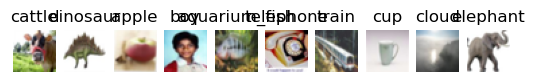

In [7]:
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(labels[int(y_train[i])])
    plt.axis('off')
plt.show()

In [8]:
# X_train = X_train.reshape(-1, 3072)
# X_test = X_test.reshape(-1, 3072)

# print("X_train Shape: ", X_train.shape)
# print("X_test Shape: ", X_test.shape)

In [9]:
X_train = X_train/255
X_test = X_test/255

print("X_train: ", X_train.max(), X_train.min())
print("X_test: ", X_test.max(), X_test.min())

X_train:  1.0 0.0
X_test:  1.0 0.0


In [10]:
def create_pairs(X, y, num_pairs=100000):
    """
    Creates pairs of images from the CIFAR-100 dataset.

    Parameters:
        X (numpy array): Flattened CIFAR-100 images of shape (num_samples, 1024).
        y (numpy array): Corresponding labels of shape (num_samples,).
        num_pairs (int): Number of pairs to generate.

    Returns:
        pairs (numpy array): Array of shape (num_pairs, 2, 1024) containing image pairs.
        labels (numpy array): Array of shape (num_pairs,) containing 0 for same-class pairs and 1 for different-class pairs.
    """
    pairs = []
    labels = []
    num_classes = 100
    class_indices = [np.where(y == i)[0] for i in range(num_classes)]  # Get indices for each class

    for _ in range(num_pairs // 2):  # Half same-class, half different-class pairs
        # Create a positive pair (same class)
        class_idx = np.random.randint(0, num_classes)
        if len(class_indices[class_idx]) > 1:
            i1, i2 = np.random.choice(class_indices[class_idx], size=2, replace=False)
            pairs.append([X[i1], X[i2]])
            labels.append(0)

        # Create a negative pair (different classes)
        class_1, class_2 = np.random.choice(num_classes, size=2, replace=False)
        i1 = np.random.choice(class_indices[class_1])
        i2 = np.random.choice(class_indices[class_2])
        pairs.append([X[i1], X[i2]])
        labels.append(1)

    return np.array(pairs), np.array(labels)

In [37]:
def display_pairs(pairs, labels, num_samples=5):
    """
    Displays pairs of CIFAR-100 images in a vertical line with their labels.

    Parameters:
        pairs (numpy array): Array of shape (num_pairs, 2, 1024) containing image pairs.
        labels (numpy array): Array of shape (num_pairs,) containing 0 for same-class pairs and 1 for different-class pairs.
        num_samples (int): Number of pairs to display.
    """
    fig, axes = plt.subplots(2, num_samples, figsize=(2 * num_samples, 4))

    for i in range(num_samples):
        img1, img2 = pairs[i]
        label = labels[i]

        # Reshape the images back to 32x32x3 (CIFAR-100 images are RGB)
        # img1 = img1.reshape(32, 32, 3)
        # img2 = img2.reshape(32, 32, 3)

        # Display the first image
        axes[0, i].imshow(img1)
        axes[0, i].axis('off')

        # Display the second image
        axes[1, i].imshow(img2)
        axes[1, i].axis('off')

        # Set title above the second image with color
        title_color = "green" if label == 0 else "red"
        axes[0, i].set_title("Positive" if label == 0 else "Negative", fontsize=10, color=title_color)

    plt.tight_layout()
    plt.show()

In [16]:
X_train_pairs, y_train_pairs = create_pairs(X_train, y_train, num_pairs=200000)
X_test_pairs, y_test_pairs = create_pairs(X_test, y_test, num_pairs=50000)

In [17]:
X_train_pairs.shape, X_test_pairs.shape

((200000, 2, 32, 32, 3), (50000, 2, 32, 32, 3))

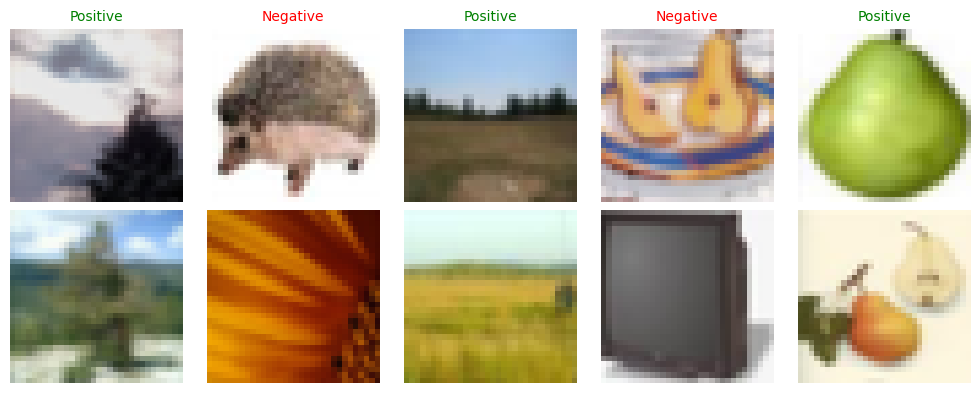

In [38]:
display_pairs(X_train_pairs, y_train_pairs, num_samples=5)

In [19]:
input1 = keras.Input(shape=(32,32,3))
input2 = keras.Input(shape=(32,32,3))

In [21]:
network = keras.models.Sequential([
    keras.Input((32,32,3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu')
])

In [22]:
twin1 = network(input1)
twin2 = network(input2)

In [23]:
def euclidean_distance(twins):
    twin1_output, twin2_output = twins
    return keras.ops.norm(twin1_output - twin2_output, axis=1, keepdims=True)
distance = keras.layers.Lambda(euclidean_distance)([twin1, twin2])

In [24]:
model = keras.Model(inputs=[input1, input2], outputs=distance)

In [25]:
def contrastive_loss(y, d):
    margin = 1
    y = keras.ops.cast(y, d.dtype)
    return (1 - y) / 2 * keras.ops.square(d) + y / 2 * keras.ops.square(keras.ops.maximum(0.0, margin - d))

In [26]:
model.compile(loss=contrastive_loss, optimizer='adam', metrics=['binary_accuracy'])

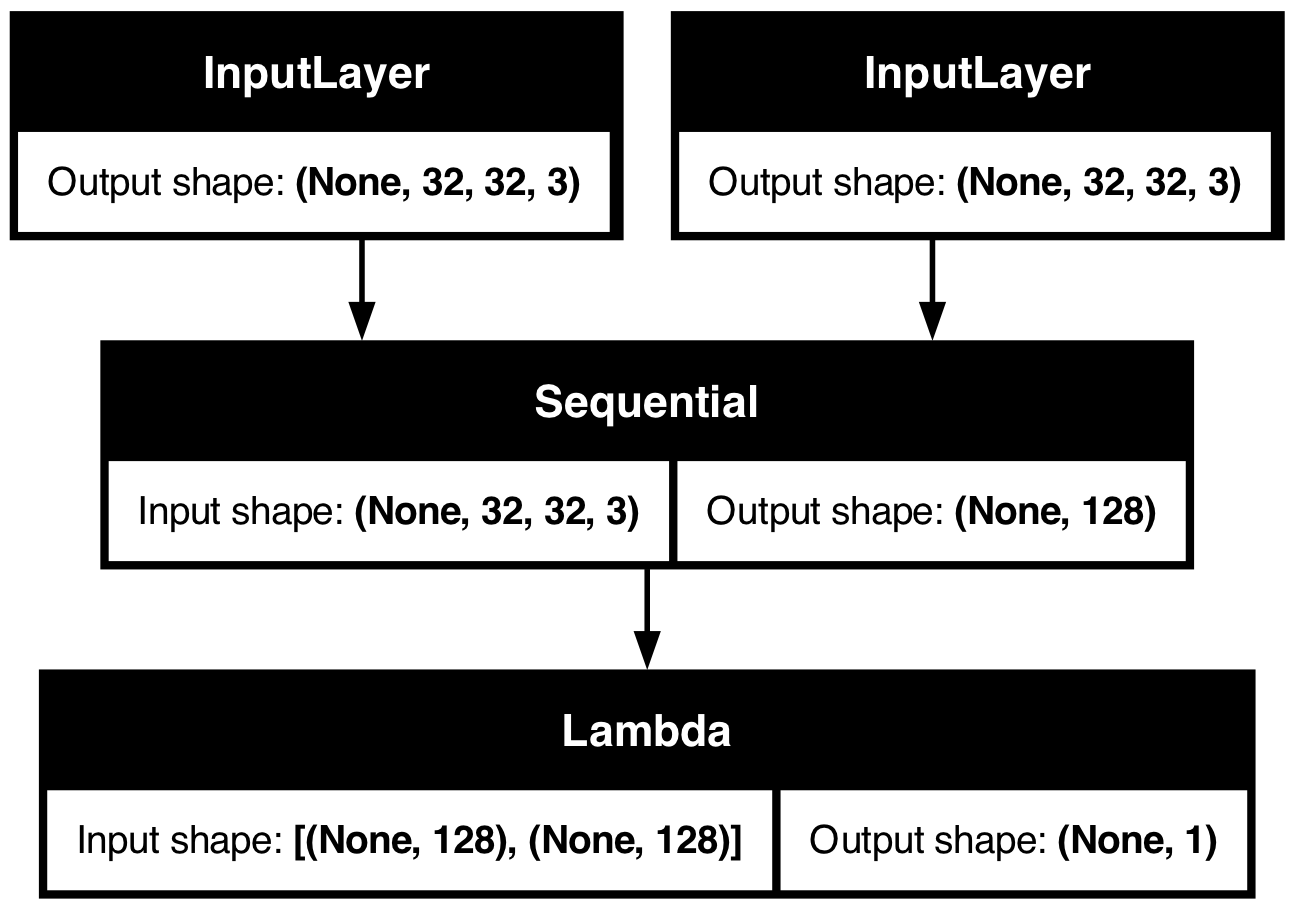

In [27]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=False, to_file='model.png')

In [32]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 128)       │    187,520 │ input_layer[0][0… │
│ (Sequential)        │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 1)         │          0 │ sequential[0][0], │
│                     │                   │            │ sequential[1][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 187,520 (732.50 KB)

 Trainable params: 187,520 (732.50 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = model.fit(
    x=[X_train_pairs[:, 0], X_train_pairs[:, 1]],
    y=y_train_pairs[:], 
    batch_size=32, 
    epochs=10, 
    validation_split=0.1
    )

: 

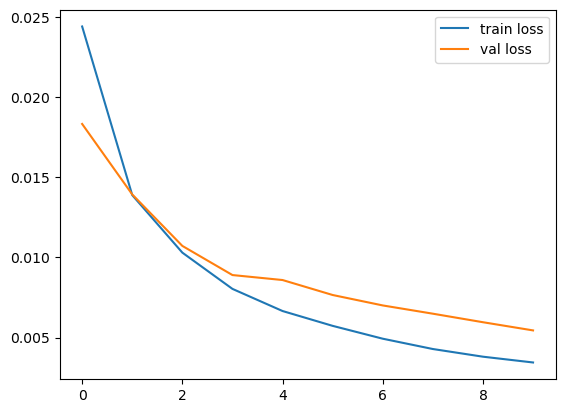

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step


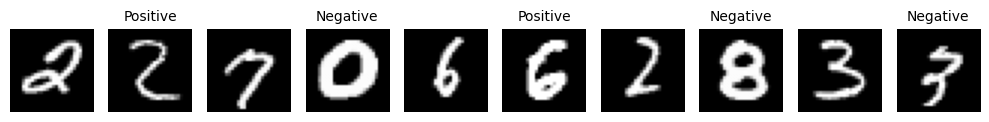

In [ ]:
predictions = model.predict([X_test_pairs[:, 0], X_test_pairs[:, 1]]) >= 0.5
display_mnist_pairs(X_test_pairs, predictions, num_samples=5)

In [ ]:
model.layers

[<InputLayer name=input_layer, built=True>,
 <InputLayer name=input_layer_1, built=True>,
 <Sequential name=sequential, built=True>,
 <Lambda name=lambda, built=True>]

In [ ]:
embedding_model = model.layers[2]
embedding_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 566,144 (2.16 MB)

 Trainable params: 566,144 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
index1 = np.random.choice(np.where(y_test_pairs == 0)[0])
index2 = np.random.choice(np.where(y_test_pairs == 0)[0])
index3 = np.random.choice(np.where(y_test_pairs == 1)[0])

index1, index2, index3

(np.int64(10084), np.int64(7602), np.int64(7395))

In [ ]:
embedding1 = embedding_model(X_test_pairs[index1, 0].reshape(1, -1)).numpy()
embedding2 = embedding_model(X_test_pairs[index1, 1].reshape(1, -1)).numpy()
embedding3 = embedding_model(X_test_pairs[index3, 0].reshape(1, -1)).numpy()

In [ ]:
keras.ops.norm(embedding1 - embedding2).numpy(), keras.ops.norm(embedding1 - embedding3).numpy()

(np.float32(0.18574254), np.float32(0.9406247))